# Importazione Librerie

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Caricamento dataset e aggiunta del rumore

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data() # Non ci interessa piu la y

# Normalizziamo i dati (i pixel assumono valori da 0 a 255, normalizzandoli /255 assumeranno valori tra 0 ed 1)
x_train = x_train / 255
x_test = x_test / 255

"Funzione per aggiungere rumore"
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)  # aggiunge rumore in base ad un fattore rumore (intensita) generando numeri casuali distribuiti normalmente (gaussiani)
    noisy_images = np.clip(noisy_images, 0., 1.)  # assicura che i valori dei pixel con aggiunta di rumore non superino 0 o 1, altrimenti vengono tagliati fuori
    return noisy_images

# aggiungiamo il rumore alle immagini originali
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
"Funzione per stampare a video le immagini"
def display_images(images1, images2, titles=["Image 1", "Image 2"], number_of_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(number_of_images):
        # Display first set of images (original or noised)
        ax = plt.subplot(2, number_of_images, i + 1)
        plt.imshow(images1[i], cmap='gray')
        plt.title(titles[0])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display second set of images (noised or denoised)
        ax = plt.subplot(2, number_of_images, i + 1 + number_of_images)
        plt.imshow(images2[i], cmap='gray')
        plt.title(titles[1])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


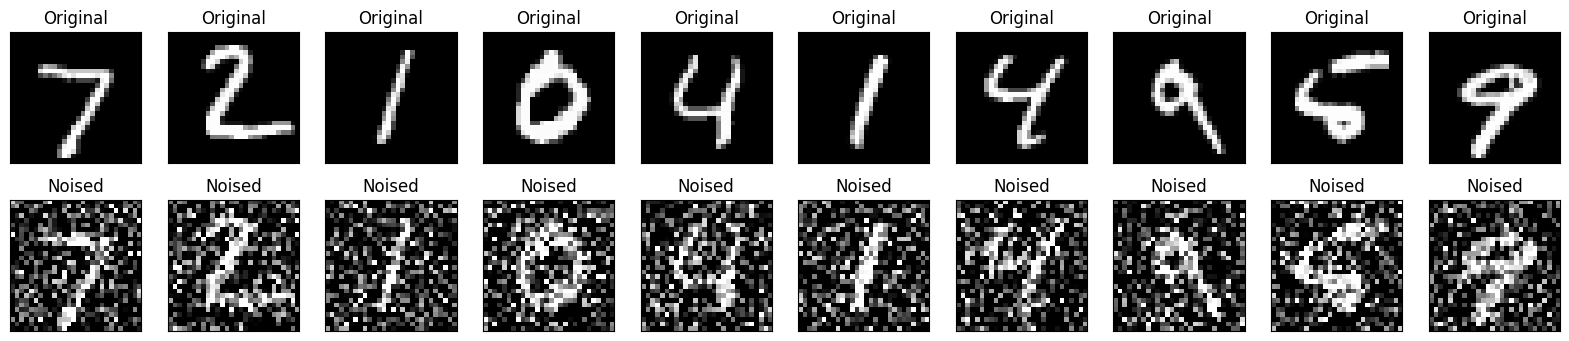

In [ ]:
display_images(x_test, x_test_noisy, titles=["Original", "Noised"], number_of_images=10)

# Implementazione Tensorflow

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 784)                 │         201,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_13 (Reshape)                 │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,050,976 (4.01 MB)

 Trainable params: 1,050,976 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - loss: 0.2169
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - loss: 0.1298
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.1198
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 0.1138
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.1102
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 0.1075
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.1056
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.1037
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - loss: 0.1025
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.1010
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


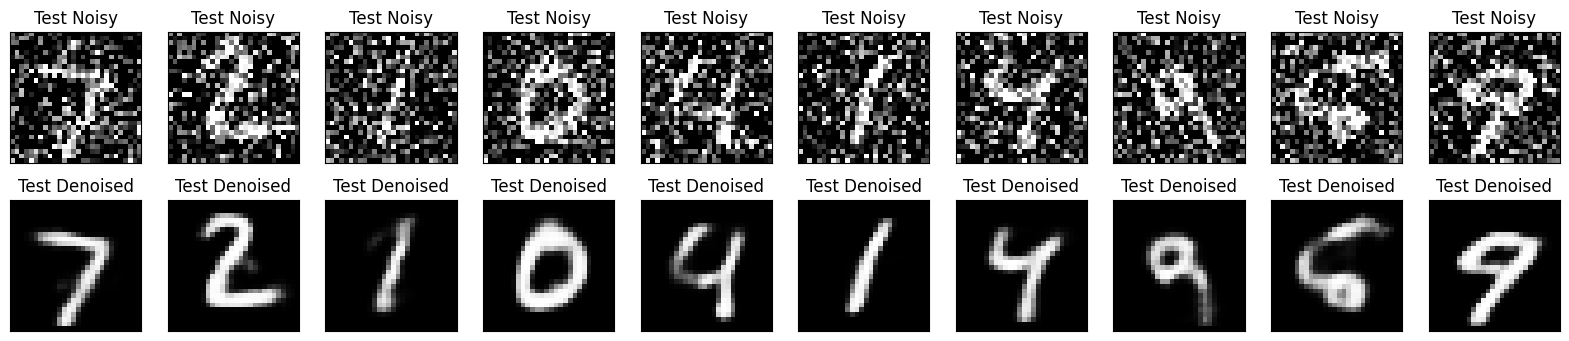

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 784)                 │          50,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_14 (Reshape)                 │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 716,640 (2.73 MB)

 Trainable params: 716,640 (2.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - loss: 0.2263
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.1302
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.1201
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.1148
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - loss: 0.1115
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 0.1091
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 0.1075
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.1061
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.1048
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - loss: 0.1040
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


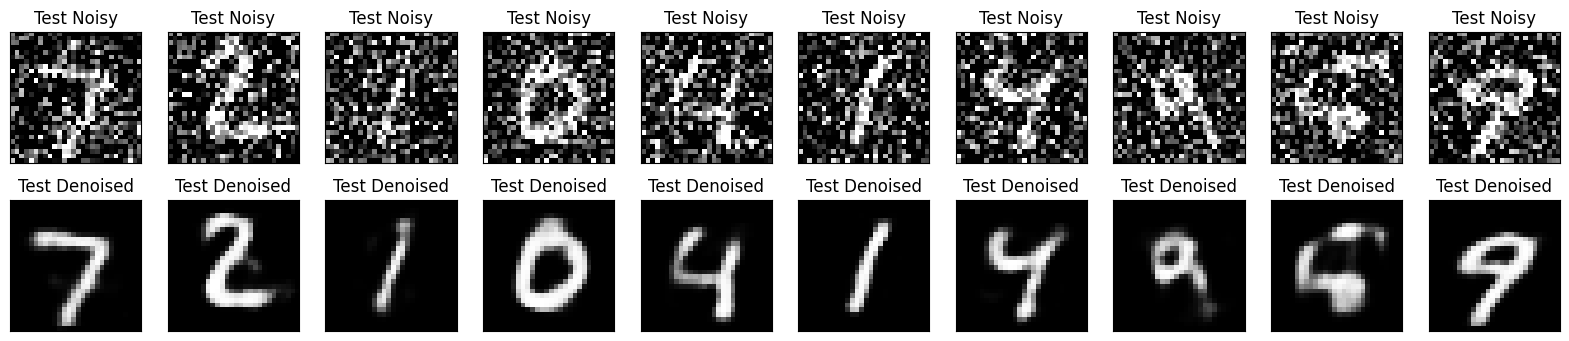

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers


(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()   # immagini 28x28, ogni pixel valore da 0 a 255

x_train = x_train / 255
x_test = x_test / 255

x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # spaghettifica in vettore monodimensionale l'immagine bi-dimensionale
model.add(layers.Dense(784, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(28*28, activation='sigmoid'))
model.add(layers.Reshape((28, 28)))


model.compile(optimizer='adam',loss='binary_crossentropy')

model.summary()

# Train autoencoder
model.fit(x_train_noisy, x_train, epochs=10, batch_size=64)

# Denoise test images
x_test_denoised = model.predict(x_test_noisy)

display_images(x_test_noisy, x_test_denoised, titles=["Test Noisy", "Test Denoised"], number_of_images=10)


model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # spaghettifica in vettore monodimensionale l'immagine bi-dimensionale
model.add(layers.Dense(784, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(28*28, activation='sigmoid'))
model.add(layers.Reshape((28, 28)))

model.summary()


model.compile(optimizer='adam',loss='binary_crossentropy')

# Train autoencoder
model.fit(x_train_noisy, x_train, epochs=10, batch_size=64)

# Denoise test images
x_test_denoised = model.predict(x_test_noisy)

display_images(x_test_noisy, x_test_denoised, titles=["Test Noisy", "Test Denoised"], number_of_images=10)

# Implementazione Pytorch

Epoch 1/5
-------------------------------
loss: 0.167239  [    0/60000]
loss: 0.106267  [ 6400/60000]
loss: 0.103299  [12800/60000]
loss: 0.098694  [19200/60000]
loss: 0.092806  [25600/60000]
loss: 0.094498  [32000/60000]
loss: 0.093576  [38400/60000]
loss: 0.091459  [44800/60000]
loss: 0.090974  [51200/60000]
loss: 0.089255  [57600/60000]
Test Error: 
 Avg loss: 0.089110 

Epoch 2/5
-------------------------------
loss: 0.089503  [    0/60000]
loss: 0.088472  [ 6400/60000]
loss: 0.088837  [12800/60000]
loss: 0.087741  [19200/60000]
loss: 0.088630  [25600/60000]
loss: 0.086349  [32000/60000]
loss: 0.086833  [38400/60000]
loss: 0.086311  [44800/60000]
loss: 0.085897  [51200/60000]
loss: 0.085537  [57600/60000]
Test Error: 
 Avg loss: 0.085317 

Epoch 3/5
-------------------------------
loss: 0.084394  [    0/60000]
loss: 0.085030  [ 6400/60000]
loss: 0.083760  [12800/60000]
loss: 0.084698  [19200/60000]
loss: 0.085092  [25600/60000]
loss: 0.084933  [32000/60000]
loss: 0.083487  [38400/6

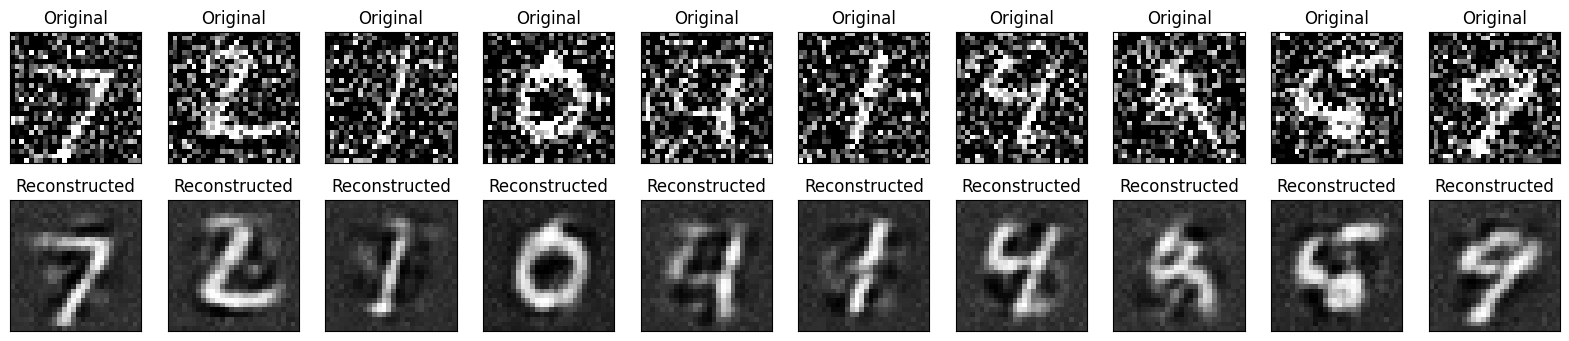

In [25]:
import torch
from torch import nn
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Funzione per aggiungere rumore
def add_noise(images, noise_factor=0.5):
    noise = np.random.normal(loc=0.0, scale=1.0, size=images.shape)  # Rumore gaussiano
    noisy_images = images + noise_factor * noise  # Aggiunge il rumore
    noisy_images = np.clip(noisy_images, 0., 1.)  # Assicura che i valori siano tra 0 e 1
    return noisy_images


(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

# Aggiungi rumore ai dati di addestramento e test
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

# Converti i dati in tensori PyTorch
x_train_noisy = torch.tensor(x_train_noisy, dtype=torch.float32).unsqueeze(1)  # Aggiungi dimensione per i canali
x_test_noisy = torch.tensor(x_test_noisy, dtype=torch.float32).unsqueeze(1)  # Aggiungi dimensione per i canali

# DataLoader per PyTorch
train_dataset = TensorDataset(x_train_noisy, x_train_noisy)
test_dataset = TensorDataset(x_test_noisy, x_test_noisy)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 512),
            nn.ReLU(),
            nn.Linear(512, 28*28),
            nn.Sigmoid(),
            nn.Unflatten(1, (1, 28, 28))
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed


# Funzione di addestramento
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, _) in enumerate(dataloader):
        X = X.to(device)
        optimizer.zero_grad()
        reconstructed = model(X)
        loss = loss_fn(reconstructed, X)
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss_value = loss.item()
            current = batch * len(X)
            print(f"loss: {loss_value:>7f}  [{current:>5d}/{size:>5d}]")

# Funzione di test
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X, _ in dataloader:
            X = X.to(device)
            reconstructed = model(X)
            test_loss += loss_fn(reconstructed, X).item()
        test_loss /= num_batches
    print(f"Test Error: \n Avg loss: {test_loss:>8f} \n")



# Visualizzazione dei risultati
def display_images(images1, images2, titles=["Original", "Reconstructed"], number_of_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(number_of_images):
        ax = plt.subplot(2, number_of_images, i + 1)
        plt.imshow(images1[i].squeeze(), cmap='gray')
        plt.title(titles[0])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, number_of_images, i + 1 + number_of_images)
        plt.imshow(images2[i].squeeze(), cmap='gray')
        plt.title(titles[1])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()


# Creazione del modello e spostamento su dispositivo
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Autoencoder().to(device)

# Loss e ottimizzatore
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


# Loop di addestramento
epochs = 5
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)


# Visualizza immagini originali e ricostruite
with torch.no_grad():
    sample, _ = next(iter(test_loader))
    sample = sample.to(device)
    reconstructed = model(sample)

display_images(sample.cpu(), reconstructed.cpu(), titles=["Original", "Reconstructed"], number_of_images=10)
